# Hypothesis Testing

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

## Null and Alternative Hypotheses

A toy picture of science has it that the scientist formulates a hypothesis that explains or generalizes from some set of observations, and then conducts some experiment, which will either confirm or refute that hypothesis.

But this is an oversimplification of good practice. Consider the possibility that the experiment yield statistically improbable results. In that case it may well be a mistake to generalize from those results or to reject an hypothesis that doesn't predict them.

Often the confirmation of some testing or **alternative hypothesis, $H_\alpha$**, is a _relative_ affair, where it is measured against some **null hypothesis, $H_0$**.

If an alternative hypothesis states that there is some significant relationship between two variables, then the null hypothesis simply states that there is no such relationship.

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

## $p$-Values

The basic idea of a p-value is to quantify the probability that the results seen are in fact the result of mere random chance. This is connected with the null hypothesis since, if the null hypothesis is true and there is no significant correlation between the population variables X and Y, then of course any correlation between X and Y observed in our sample would have to be the result of mere random chance.

### How Unlikely Is Too Unlikely?

Suppose we calculate a p-value for some statistic we've measured (more on this below!) and we get a p-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

In practice, a p-value _threshold_ of 5% is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis and _accept_ the alternative hypothesis.

## An Example

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 25 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis here?

In [ ]:
# There is no diff between the weight of a Gabonese
# elephant and an ordinary African elephant


What is our alternative hypothesis here?

In [ ]:
# The avg weight of a Gabonese elephant is less than 
# that of a typical African elephant



In [14]:
african_elephants = stats.norm?

In [15]:
african_elephants = stats.norm(loc=9000, scale=900)

In [24]:
african_elephants.rvs(25)
            

array([10474.54223408,  9737.61426335,  7859.62157886,  9931.07456783,
        8279.37060887,  9555.71613991,  8809.51376876,  9680.64914313,
        9326.77017662,  8496.16501862,  9248.36973819,  9835.84808686,
        9082.47098575,  8427.46950269,  9941.48433712, 10285.10309217,
        9030.24900044, 10203.25123173,  9043.05864394,  9132.19848427,
        8093.31361103,  8822.97375196,  9217.36351392,  8747.93932643,
        9401.4874307 ])

In [67]:
sample_means = [african_elephants.rvs(25).mean()
                for _ in range(10000)]

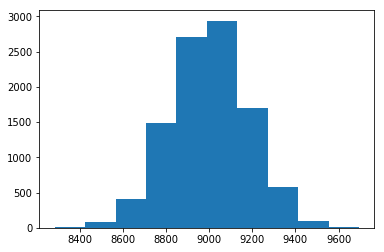

In [68]:
plt.hist(sample_means);

In [63]:
gabon_mean = 8637

In [87]:
sample_means = np.array([african_elephants.rvs(1).mean()
                for _ in range(10000)])

In [88]:
(sample_means <= gabon_mean)

array([ True, False, False, ..., False, False,  True])

In [89]:
(sample_means <= gabon_mean).mean()

0.3432

Let's set a threshold value of $p = 0.05$ for rejecting the null hypothesis.

The standard error for our sample is:
$\large\frac{\sigma}{\sqrt{n}} = \frac{900}{\sqrt{25}} = 180$.

In [2]:
se = 900 / np.sqrt(25)
se

180.0

The z-score will be: $\large\frac{\bar{x} - \mu}{se} = \frac{8637 - 9000}{180} = -\frac{363}{180} = -2.02$.

In [3]:
z = (8637 - 9000) / 180
z

-2.0166666666666666

In [4]:
stats.norm.sf(z) # This is the "survival function": 1 - cdf(z)

0.97813484463207

The "area of the tail" corresponding to this z-score is only 2.2%. The area for both tails is thus 4.4%, still less than our 5% threshold value.

Thus we ought to reject the null hypothesis and conclude that the Gabonese elephants are statistically significant!

## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)

Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a **"false positive"**. Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a **"false negative"**.

### A Function

Suppose I start flipping the same coin twice a day. What I'm curious about is whether the coin is fair or not.

My null hypothesis will be that there is "nothing to see here", i.e. that the coin is after all fair. The alternative hypothesis will of course be that the coin is not.

- **NH**: The coin is fair.
- **AH**: The coin is biased.

My statistical test will consist of flipping the coin a number of times and looking at those flips' results.

If the coin is fair, then my test will result either in a true negative (accurate) or a false positive (inaccurate). If the coin is biased, then the test will result either in a true positive (accurate) or a false negative (inaccurate).

Suppose that I set my value for $\beta$. What I want to understand is how the threshold for rejection of the null hypothesis varies as a function of $\beta$ and of the number of tosses $k$ that come up "heads".

I want to write a function that will tell me, given inputs for $p$ and $k$, how many tosses I would need to make before I should reject the null hypothesis.

We'll use the ```.binom_test()``` method in scipy's stats module.

In [91]:
np.random.random()

0.4500006215069269

In [100]:
class Coin:
    """A shiny piece of metal with a head and/or tail."""
    
    def __init__(self, p=.5):
        """Create a new Coin.
        Parameters
        ----------
        p : float
            The probability of heads.
        """
        self.p = p
        
    def flip(self):
        """Return True if heads, False if tails."""
        return np.random.random() <= self.p


In [113]:
coins = np.array([Coin(), Coin(), Coin(p=1), Coin(p=.6)])

In [115]:
np.random.shuffle(coins)

In [116]:
coin = coins[0]

In [111]:
np.mean([coin.flip() for _ in range(10)])

0.2

In [124]:
fair_coin = Coin(p=0.5)

In [127]:
sample_means = np.array([np.mean([fair_coin.flip() for _ in range(10)]) 
 for _ in range(10000)])

(array([   6.,  111., 1681.,    0., 2040., 4473., 1157.,    0.,  419.,
         113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

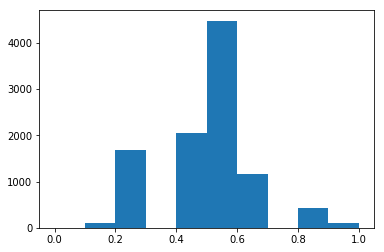

In [128]:
plt.hist(sample_means)

In [131]:
np.mean(sample_means >= .8)

0.0532

In [153]:
# Let's test it out!
stats.binom_test(x=8, 
                 n=10, 
                 p=0.5, 
                 alternative='two-sided')



0.10937500000000003

In [154]:
stats.binom_test(x=8, 
                 n=10, 
                 p=0.5, 
                 alternative='greater')

0.054687500000000014